In [31]:
import numpy as np
import sys
import pandas as pd
import csv

In [32]:
train_data = pd.read_csv('train.csv',encoding='big5')

In [45]:
train_data.head()

,日期,測站,測項,0,1,2,3,4,5,6,...,14,15,16,17,18,19,20,21,22,23
0,2014/1/1,豐原,AMB_TEMP,14,14,14,13,12,12,12,...,22,22,21,19,17,16,15,15,15,15
1,2014/1/1,豐原,CH4,1.8,1.8,1.8,1.8,1.8,1.8,1.8,...,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8
2,2014/1/1,豐原,CO,0.51,0.41,0.39,0.37,0.35,0.3,0.37,...,0.37,0.37,0.47,0.69,0.56,0.45,0.38,0.35,0.36,0.32
3,2014/1/1,豐原,NMHC,0.2,0.15,0.13,0.12,0.11,0.06,0.1,...,0.1,0.13,0.14,0.23,0.18,0.12,0.1,0.09,0.1,0.08
4,2014/1/1,豐原,NO,0.9,0.6,0.5,1.7,1.8,1.5,1.9,...,2.5,2.2,2.5,2.3,2.1,1.9,1.5,1.6,1.8,1.5


In [46]:
'''提取出所有PM2.5的数据'''
PM2_5data = train_data[train_data['測項'] == 'PM2.5']
data = train_data.iloc[:,3:]

In [47]:
PM2_5data = PM2_5data.iloc[:,3:]
PM2_5data

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
9,26,39,36,35,31,28,25,20,19,30,...,36,45,42,49,45,44,41,30,24,13
27,21,23,30,30,22,18,13,13,11,22,...,53,43,43,45,46,32,16,19,22,26
45,19,25,27,20,16,14,15,8,4,9,...,32,36,34,45,40,41,23,29,23,37
63,27,27,14,20,22,24,26,33,48,50,...,62,55,56,67,78,83,90,75,85,82
81,80,80,76,81,75,66,70,65,66,57,...,64,73,57,57,53,70,70,60,68,66
99,66,55,46,46,46,42,35,35,40,45,...,62,59,61,50,60,62,62,50,45,43
117,41,32,35,31,33,25,36,28,33,29,...,62,61,47,54,57,59,61,43,39,38
135,48,53,60,60,52,47,45,50,43,40,...,35,36,36,32,33,33,34,21,15,13
153,18,15,9,9,14,15,20,16,23,16,...,20,20,20,18,18,22,15,11,1,1
171,6,7,7,0,0,1,1,7,7,8,...,23,20,18,15,16,10,6,11,22,28


In [49]:
data

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,14,14,14,13,12,12,12,12,15,17,...,22,22,21,19,17,16,15,15,15,15
1,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,...,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8
2,0.51,0.41,0.39,0.37,0.35,0.3,0.37,0.47,0.78,0.74,...,0.37,0.37,0.47,0.69,0.56,0.45,0.38,0.35,0.36,0.32
3,0.2,0.15,0.13,0.12,0.11,0.06,0.1,0.13,0.26,0.23,...,0.1,0.13,0.14,0.23,0.18,0.12,0.1,0.09,0.1,0.08
4,0.9,0.6,0.5,1.7,1.8,1.5,1.9,2.2,6.6,7.9,...,2.5,2.2,2.5,2.3,2.1,1.9,1.5,1.6,1.8,1.5
5,16,9.2,8.2,6.9,6.8,3.8,6.9,7.8,15,21,...,11,11,22,28,19,12,8.1,7,6.9,6
6,17,9.8,8.7,8.6,8.5,5.3,8.8,9.9,22,29,...,14,13,25,30,21,13,9.7,8.6,8.7,7.5
7,16,30,27,23,24,28,24,22,21,29,...,65,64,51,34,33,34,37,38,38,36
8,56,50,48,35,25,12,4,2,11,38,...,52,51,66,85,85,63,46,36,42,42
9,26,39,36,35,31,28,25,20,19,30,...,36,45,42,49,45,44,41,30,24,13


In [56]:
ItemNum=18
X_Train=[]        #训练样本features集合
Y_Train=[]        #训练样本目标PM2.5集合
for i in range(int(len(data)/ItemNum)):
    day = data[i*ItemNum:(i+1)*ItemNum] #一天的观测数据
    for j in range(15):
        x = day.iloc[:, j:j + 9]
        y = int(day.iloc[9,j+9])
        X_Train.append(x)
        Y_Train.append(y)


In [57]:
day

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
4302,14,14,14,14,14,14,14,14,14,15,...,19,18,17,16,15,14,13,13,13,13
4303,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.7,...,1.7,1.7,1.7,1.8,1.8,1.8,1.8,1.8,1.8,1.8
4304,0.21,0.2,0.17,0.17,0.16,0.14,0.15,0.21,0.2,0.22,...,0.24,0.27,0.31,0.5,0.55,0.48,0.47,0.51,0.57,0.56
4305,0.06,0.09,0.05,0.06,0.05,0.04,0.03,0.05,0.09,0.09,...,0.08,0.11,0.23,0.3,0.2,0.15,0.16,0.16,0.19,0.19
4306,1.4,1.6,1.3,0.3,0.3,0.5,0.3,0.8,1.4,2,...,1.3,1.3,0.9,1.1,1.3,1,1.5,1.5,1.1,1.3
4307,8.5,8.7,4.1,6.3,4.3,4,4.4,7.3,7.6,8.1,...,6.1,8,11,18,19,13,13,13,13,14
4308,9.9,10,5.4,6.6,4.6,4.5,4.8,8.1,9,10,...,7.4,9.3,11,19,21,14,15,15,14,15
4309,23,22,32,30,32,32,32,28,27,27,...,37,39,37,26,18,18,14,13,13,13
4310,17,22,11,16,5,12,7,19,17,31,...,8,13,28,39,45,54,66,50,32,22
4311,6,1,1,1,0,0,0,2,2,8,...,1,7,24,37,49,37,28,17,24,29


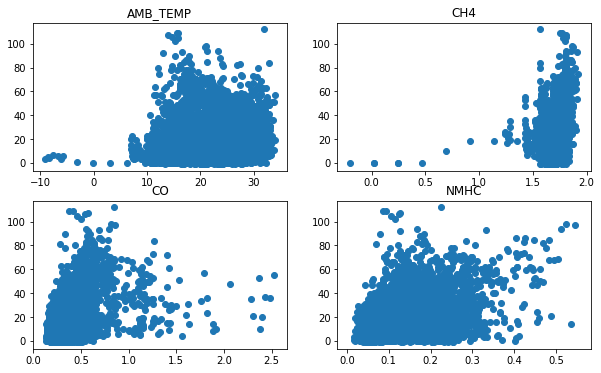

In [76]:
import matplotlib.pyplot as plt
'''绘制散点图'''
x_AMB_TEMP=[]
x_CH4=[]
x_CO=[]
x_NMHC=[]
y=[]
for i in range(len(Y_Train)):
    y.append(Y_Train[i])
    x=X_Train[i]
    #求各测项的平均值
    x_AMB_TEMP_sum=0
    x_CH4_sum=0
    x_CO_sum=0
    x_NMHC_sum=0
    for j in range(9):
        x_AMB_TEMP_sum+=float(x.iloc[0,j])
        x_CH4_sum += float(x.iloc[1, j])
        x_CO_sum += float(x.iloc[2, j])
        x_NMHC_sum += float(x.iloc[3, j])
    x_AMB_TEMP.append(x_AMB_TEMP_sum / 9)
    x_CH4.append(x_CH4_sum / 9)
    x_CO.append(x_CO_sum / 9)
    x_NMHC.append(x_NMHC_sum / 9)
    
    
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.title('AMB_TEMP')
plt.scatter(x_AMB_TEMP, y)
plt.subplot(2, 2, 2)
plt.title('CH4')
plt.scatter(x_CH4, y)
plt.subplot(2, 2, 3)
plt.title('CO')
plt.scatter(x_CO, y)
plt.subplot(2, 2, 4)
plt.title('NMHC')
plt.scatter(x_NMHC, y)
plt.show()

In [71]:
x=X_Train[i]

In [73]:
x.iloc[1,1]

'1.8'